### Examen final
**Alumno:** Emilio Alba Robles

**Profesor:** Salvador Hernández Castro





**Problema 13.13 Henley/Seader/Roper, inciso b**

<img src = ".\imagenes/Problema.png">
<img src = ".\imagenes/inciso.png">



Se le dará solución a este problema haciendo uso de herramientas computacionales. Se hace uso de un método analítico basado en el método gráfico de McCabe-Thiele, apoyado por gráficos generados.

### Planteamiento
Dado que desea tener una composición constante de destilado, la relación de reflujo debe variar para asegurar esto: 
$$\frac{L}{V} \longrightarrow variable$$

Es posible conocer la composición del residuo para cada relación de reflujo empleando el método de McCabe-Thiele, en este caso se trabaja con una sola recta de operación pues se está empleando una destiación por lotes. El problema indica que se tiene 8 etapas, esto es, el hervidor más 7 platos.


Inicialmente se tienen 100 mol de mezcla líquida en la columna (W0), con fracción mol de acetona de 0.5. La fracción mol del destilado es de 0.9. Se trabajarán con varias relaciones de reflujo: 0.95, 0.89,0.85,0.8,0.75, 0.7, 0.65 y 0.6. El problema sugiere que la fracción mol en el residuo al final de la destilación es de 0.1.


In [1]:
#Los datos del equilibrio a 101kPa

y = [0,0.16,0.25,0.42,0.51,0.6,0.67,0.72,0.79,0.87,0.93,1] #fracción de A en el vapor
x = [0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #fracción de A en el líquido

N = 8 #etapas
W0 = 100
xw0 = 0.5
xD = 0.9 #fracción mol de destilado

relaciones_reflujo = [0.95,0.89,0.85,0.8,0.75,0.7,0.65,0.6]#,0.55,0.5]

In [2]:
#Se importan las librerías necesarias.

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

A continuación se definen algunas funciones útiles, las cuales van a permitir realizar los gráficos necesarios.

In [3]:
def recta_operacion_y(m: float, x1: float, y1: float, x: float) -> float: #paso vertical
    return m*(x-x1) + y1

def interpolacion(x: list, y: list, y_interp: float) -> float:
    return x[0] + (x[1] - x[0])/(y[1] - y[0])*(y_interp - y[0])

def interp_equilibrio(x: list, y: list, yi: float) -> float: #paso horizontal, función de apoyo
    for item in y:
        if item > yi:
            i = y.index(item)
            
            xni = interpolacion(
                x[i-1:i+1],
                y[i-1:i+1],
                yi
            )
            break
    return xni

def eval_n_etapas(N, x: list, y: list, xD, relaciones_reflujo, X, Y) -> float:
    #función maestra, retorna una matriz X y una Y con los valores de x e y que definen los pasos (etapas)
    #del método gráfico.
    
    for j in range(len(relaciones_reflujo)):
        yi = xD
        for i in range(N):
            xni = interp_equilibrio(x,y,yi)
            X[i+1][j] = xni
            if i == N-1:
                break
            yni = recta_operacion_y(relaciones_reflujo[j], xD, xD, xni)
            Y[i+2][j] = yni
            yi = yni
        
    return X, Y

In [4]:
#Elaboración de las matrices que contendrán los datos de x e y para los distintos valores de L/V

X = np.zeros((N+1,len(relaciones_reflujo)))
Y = np.zeros((N+1,len(relaciones_reflujo)))

Y[0], Y[1],X[0]=xD,xD,xD

In [5]:
#Evaluación del método

X,Y = eval_n_etapas(N, x, y, xD, relaciones_reflujo, X, Y)   

In [6]:
#Elaboración de las matrices a emplear para los gráficos

Xp = np.zeros((2*N+1, len(relaciones_reflujo)))
Xp[0] = xD
for i in range(len(X)-1):
    Xp[2*i+1:2*(i+1)+1,:] = X[i+1]


Yp = np.zeros((2*N+1, len(relaciones_reflujo)))
for i in range(len(Y)-1):
    Yp[2*i:2*(i+1),:] = Y[i+1]

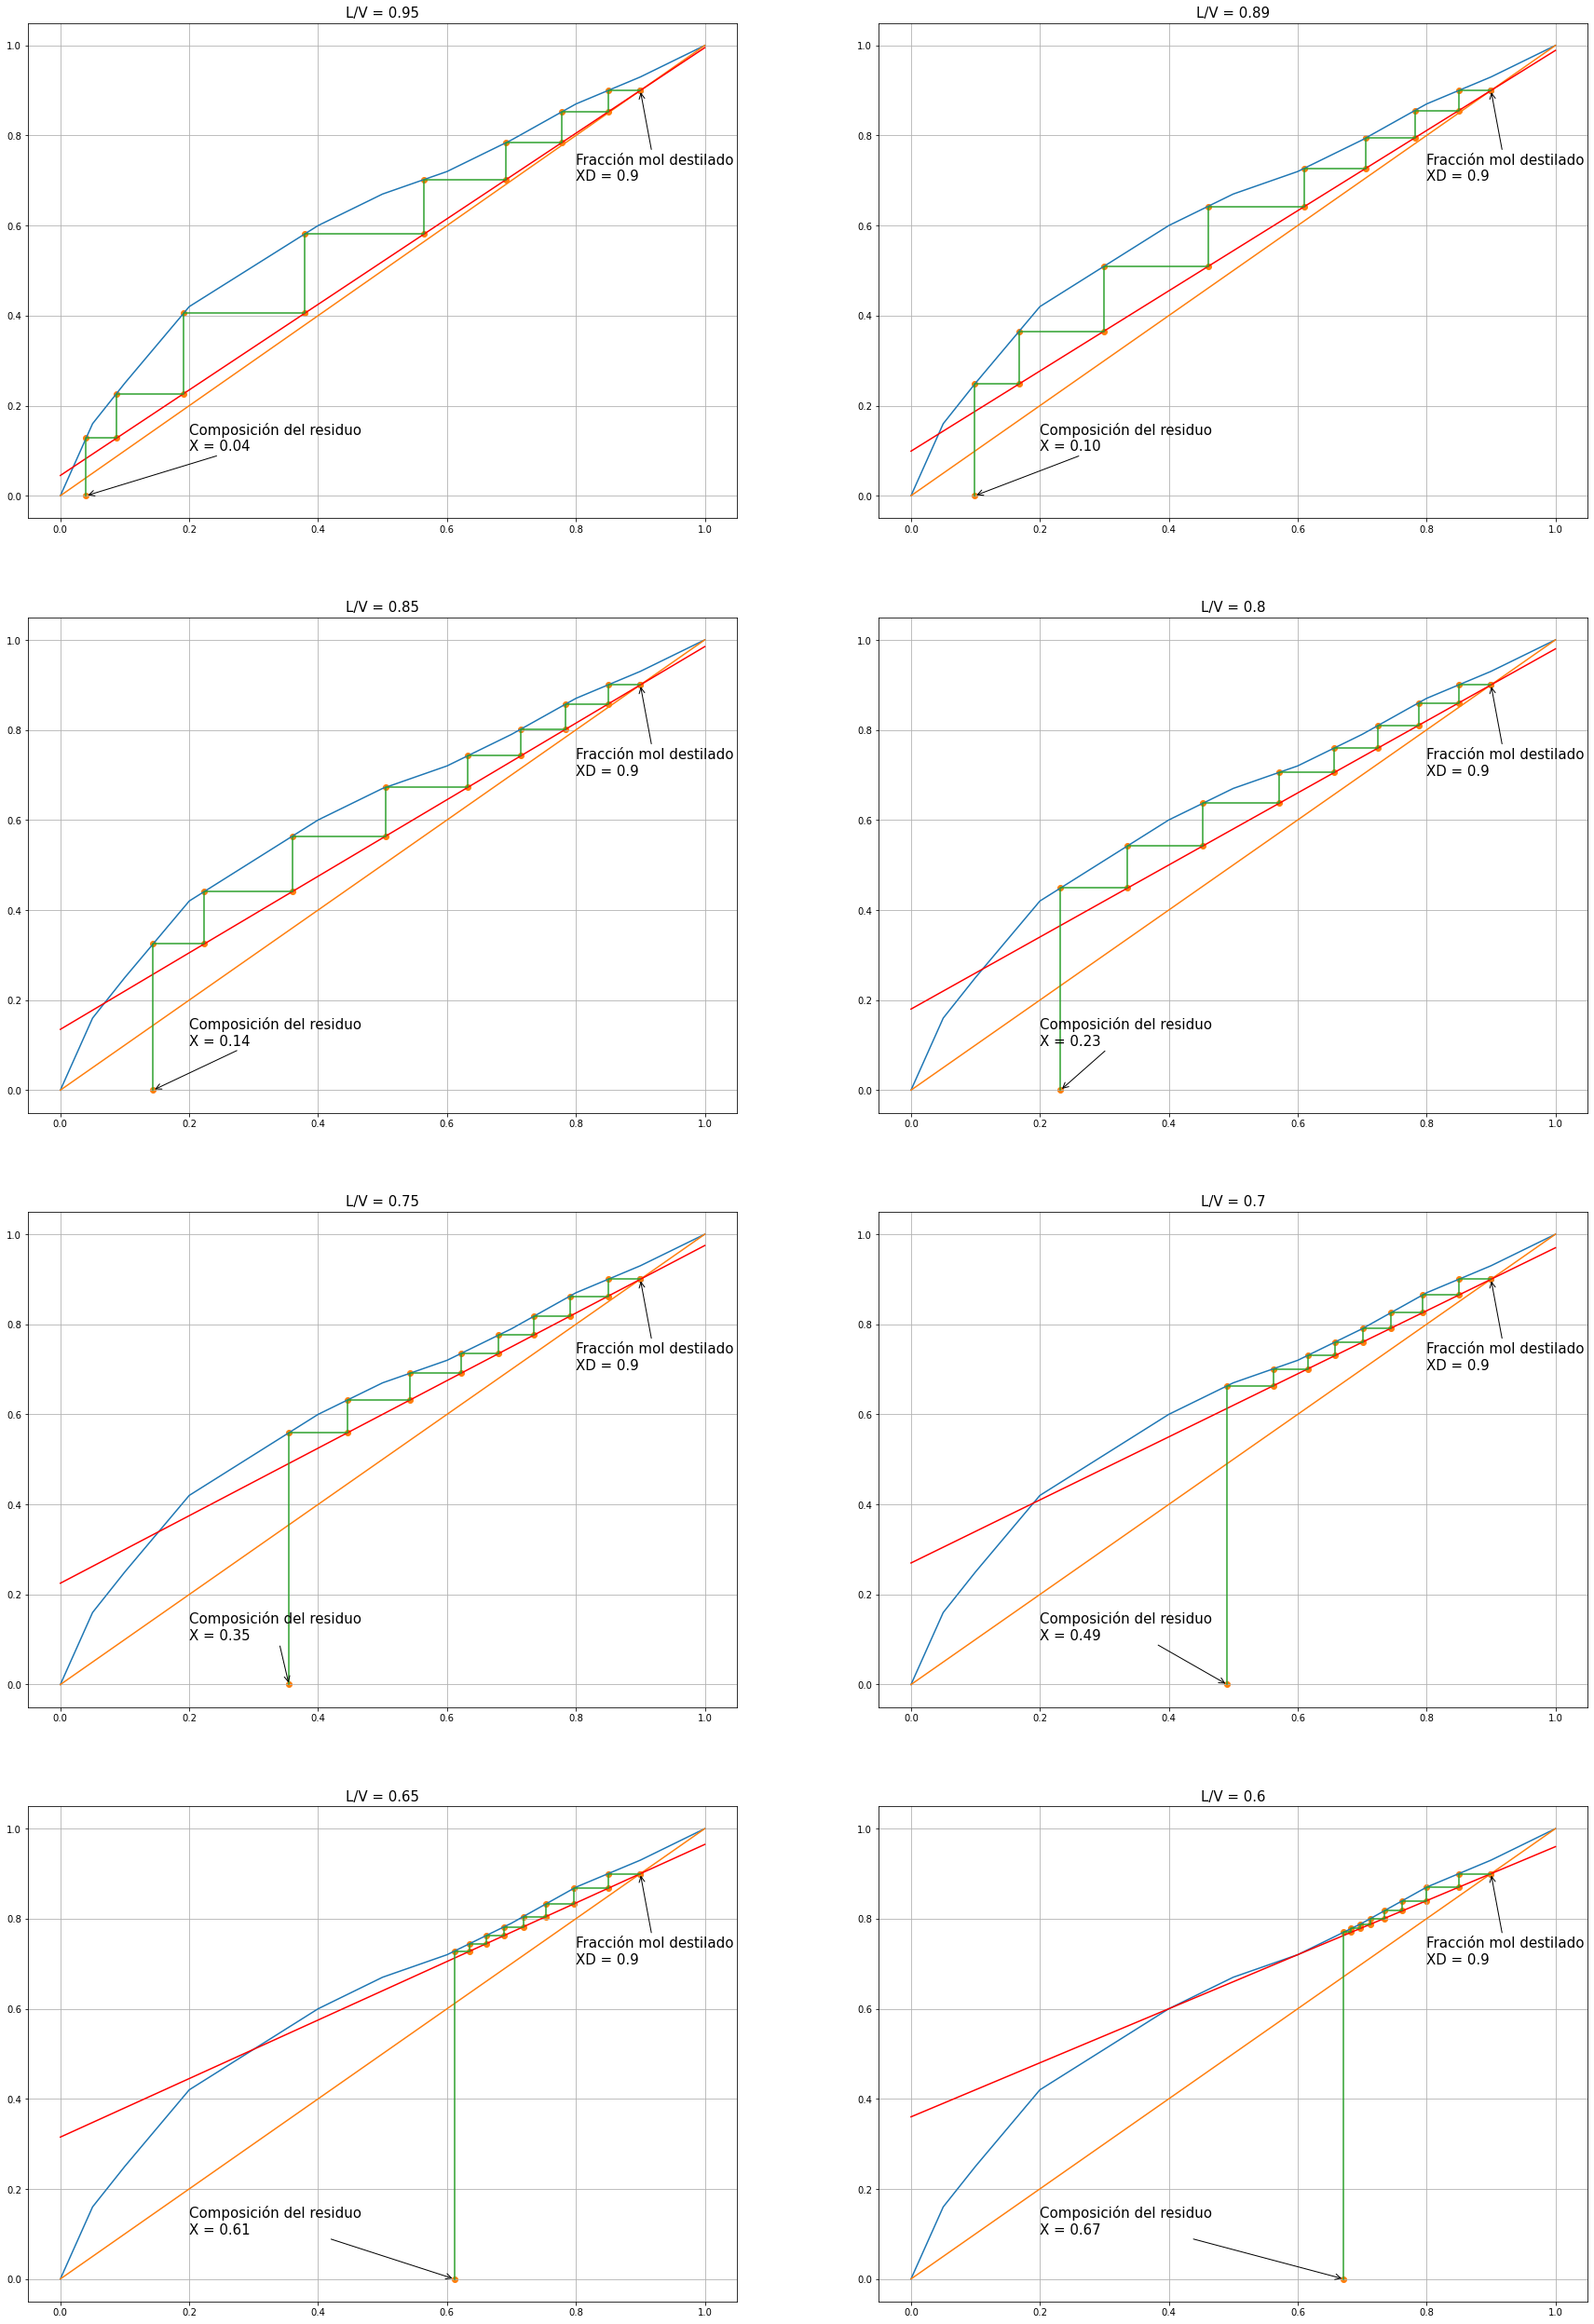

In [7]:
#Elaboración de los gráficos

fig, ax = plt.subplots(4,2, figsize = (30,45))

for i,ax in enumerate(ax.flat):

    ax.plot(x,y) #curva de equilibrio
    ax.plot(x,x) #recta de apoyo x = y
    ax.plot(x,recta_operacion_y(relaciones_reflujo[i],xD,xD,np.array(x)),color = "red") #recta de operación
    
    ax.scatter(xD,xD) # Fracción mol del destilado
    
    #ETAPAS
    ax.scatter(Xp[:,i:i+1], Yp[:,i:i+1])
    ax.plot(Xp[:,i:i+1], Yp[:,i:i+1])

    ax.grid()
    ax.set_title(
        f"L/V = {relaciones_reflujo[i]}",
        fontsize=15,
        )
    ax.annotate(
        f"Fracción mol destilado\nXD = {xD}",
        size = 15,
        xy = (xD,xD),
        xytext = (0.8,0.7),
        arrowprops=dict(arrowstyle = "->")
        )
    ax.annotate(
        f"Composición del residuo\nX = {X[-1][i]:.2f}",
        size = 15,
        xy = (X[-1][i], 0),
        xytext = (0.2,0.1),
        arrowprops=dict(arrowstyle = "->")
        )


Con los datos obtenidos arriba es posible ahora hacer un **gráfico de la relación de reflujo vs la composición del residuo**, donde podemos ver claramente que la la composición del residuo disminuye a medida que la relación de reflujo es mayor. 

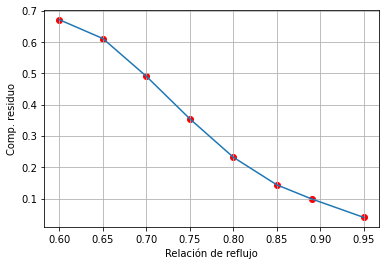

In [8]:
plt.plot(relaciones_reflujo, X[-1])
plt.scatter(relaciones_reflujo, X[-1],color = "red")
plt.xlabel("Relación de reflujo")
plt.ylabel("Comp. residuo")
plt.grid()


Los moles totales vaporizados y la cantidad de líquido que permanece en el rehervidor se determinan a partir del método de Bogart, en el cual: 

$$V_{tot} = V*t = W_0(x_D - x_{w0})\int_{x_{wt}}^{x_{w0}} \frac{dx}{(1-L/V)(x_D - x_W)^2}$$

y

$$W = W_0 \left[ \frac{x_D - x_{w0}}{x_D - x_w}\right]$$

Donde:
$$W_0 = 100$$
$$x_{w0} = 0.5$$
$$x_D = 0.9$$
$$x_{wt} = 0.1$$

El integrando se tiene pero en forma de un conjunto de datos discretos, por lo que se empleará el método de simpson para evaluar tal integral. De los datos obtenidos de la composición en función de la relación de reflujo, se escoge como límite inferior el dato para L/V = 0.89, mientras que para el superior el de L/V = 0.7. 

Esto es así porque la composición enel tiempo inicial es de 0.5 y al final de la destilación es de 0.1.

In [9]:
integrando = 1/((1-np.array(relaciones_reflujo))*(xD-np.array(X[-1]))**2)
print(integrando)

[27.03519474 14.16878223 11.66257967 11.20675771 13.45436778 19.88978967
 34.26670796 47.81343832]


In [10]:
I = integrate.simpson(integrando[1:6], X[-1][1:6])
Vtotal = W0*(xD-xw0)*I
print(f"Los moles totales vaporizados: {Vtotal} mol")

Los moles totales vaporizados: 209.42650945441557 mol


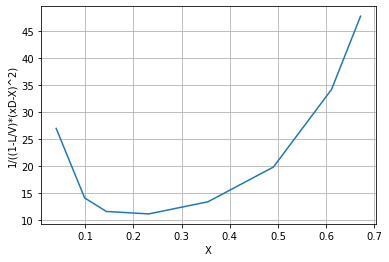

In [11]:
#Gráfico que muestra el integrando en función de la composición del residuo.

plt.plot(X[-1], integrando)
plt.ylabel("1/((1-L/V)*(xD-X)^2)")
plt.xlabel("X")
plt.grid()


Finalmente, el **líquido residual en función de la relación de reflujo** se obtiene de la expresión para W. Observamos cómo la relación de reflujo debe ser menor a medida que el líquido residual es mayor.

In [12]:
W = 100*((xD-xw0)/(xD-X[-1]))

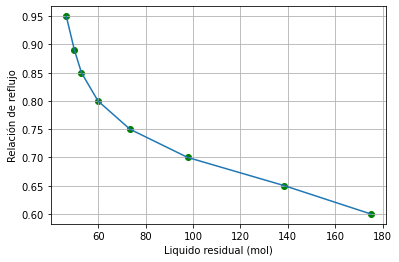

In [13]:
plt.plot(W,relaciones_reflujo)
plt.scatter(W,relaciones_reflujo,color = "green")
plt.ylabel("Relación de reflujo")
plt.xlabel("Liquido residual (mol)")
plt.grid()
